In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [2]:
customer_data = pd.read_csv('Wholesale customers data.csv')
customer_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
customer_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


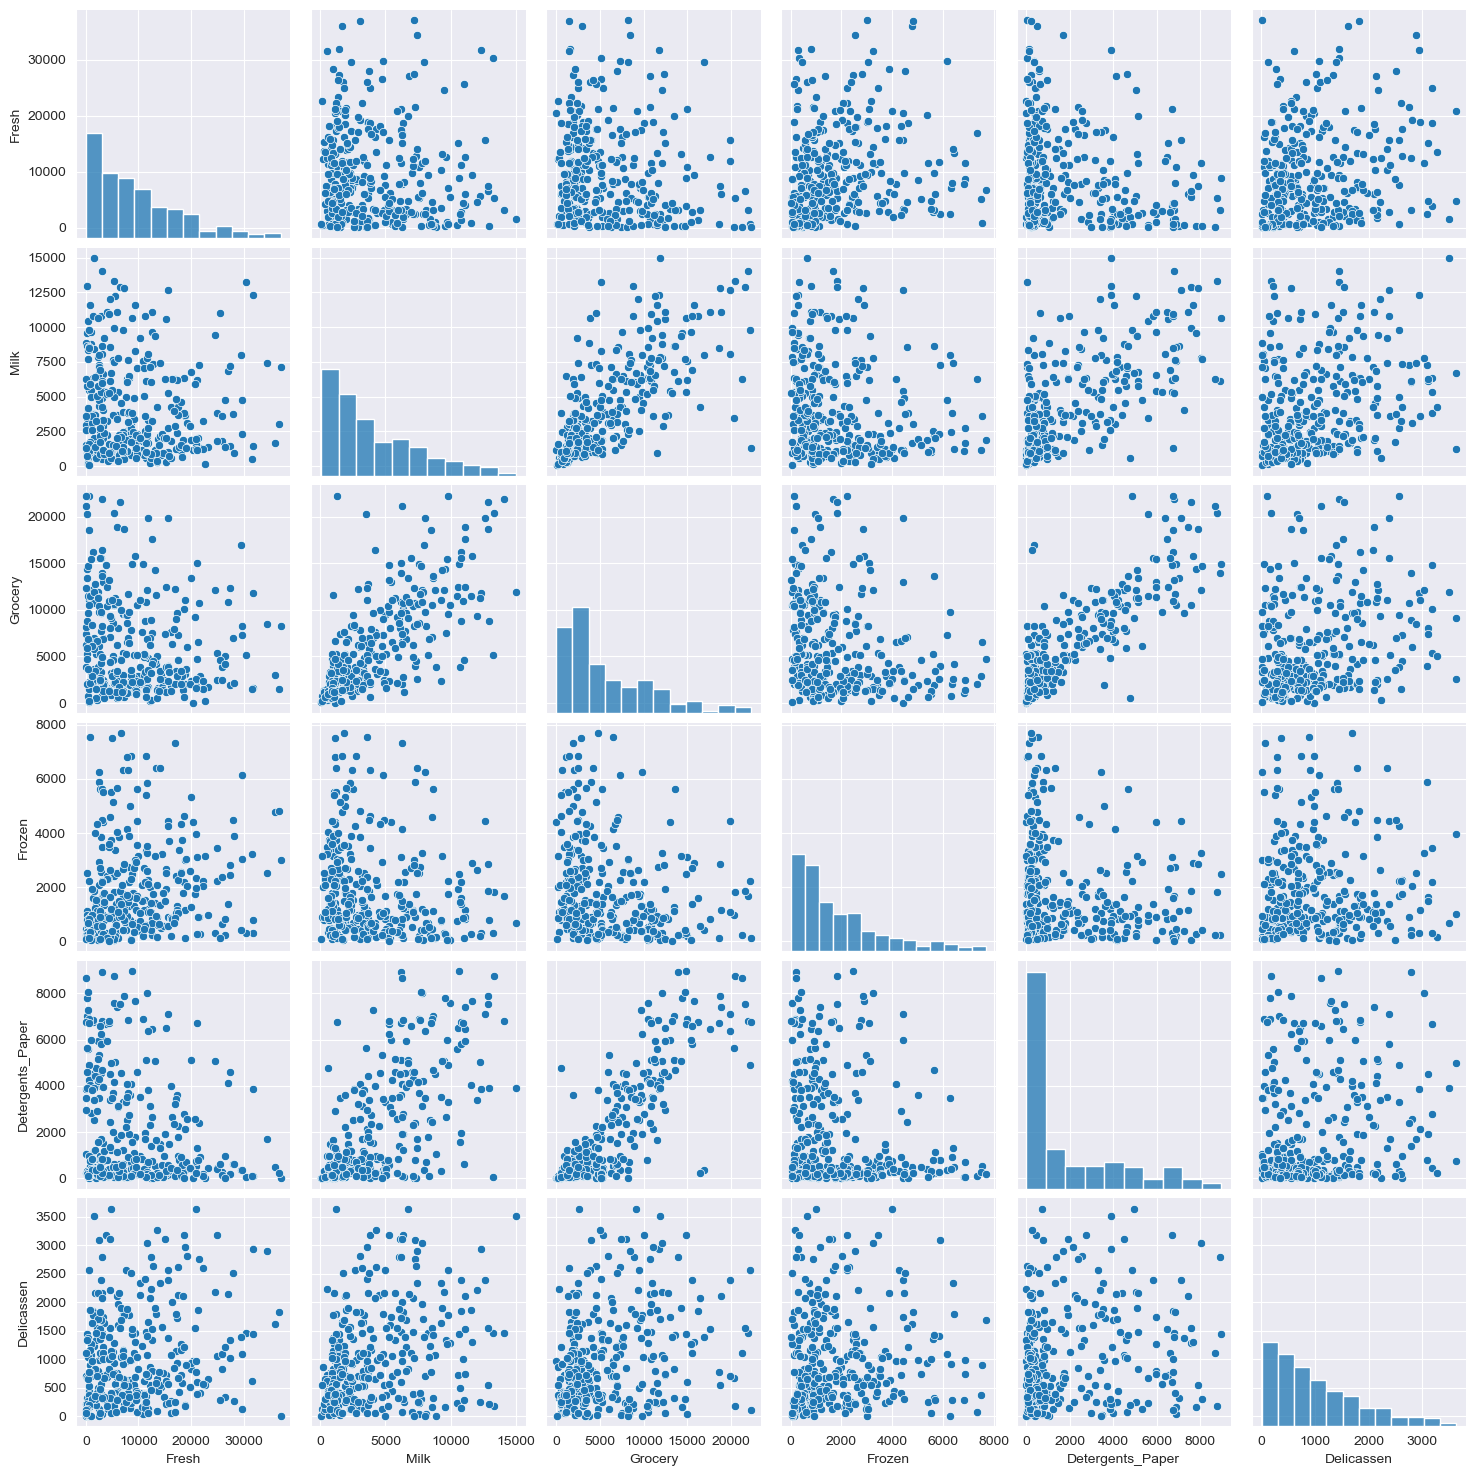

In [4]:
normalized_customer_data = customer_data.copy()
for column in customer_data.columns:
    Q1 = np.quantile(customer_data[column],0.25)
    Q3 = np.quantile(customer_data[column],0.75)
    IQR = Q3 - Q1
    Low = Q1 - 1.5 * IQR
    High = Q3 + 1.5 * IQR
    normalized_customer_data = normalized_customer_data[normalized_customer_data[column].between(Low, High)]
sns.pairplot(data=normalized_customer_data, vars=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])
plt.show()

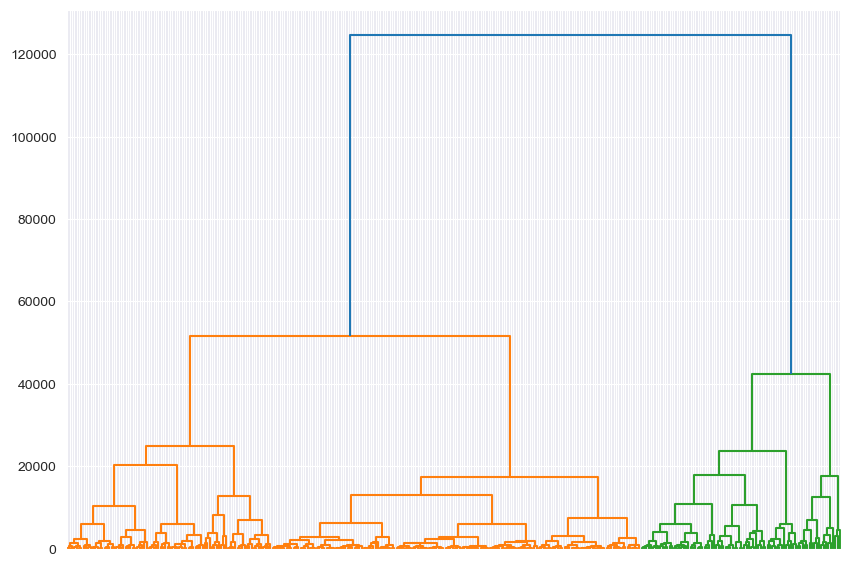

In [8]:
data = normalized_customer_data[['Grocery', 'Milk']]
linked = linkage(data, 'ward')
plt.figure(figsize=(10,7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.tick_params(labelbottom=False, bottom=False)
plt.show()

In [6]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)
print(cluster.labels_)

[0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0]


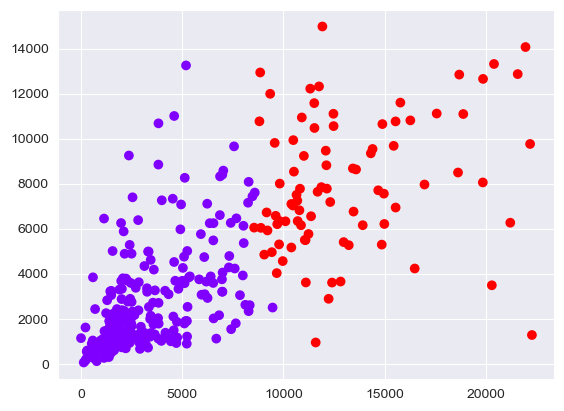

In [7]:
plt.scatter(data['Grocery'],data['Milk'], c=cluster.labels_, cmap='rainbow')